# Steps performed :

1. Clean the given dataset : Handle missing values 
2. Identify duplicates by reconsidering selective features
3. Identify Data Imbalance problem
4. Look into the dataset for feature engineering and try to solve data imbalance issues by right feature selection. 
5. Derive new features for machine learning model 
6. Create a new dataset for further processing 

# Pre-requisite:
    Ensure datafolder and required csv datafile is in place before running the code. 

In [1]:
#Modify the directory & File name based on your local paths & file name
dataFolder = "C:/Users/shaaruns.CORPDOM/Documents/BITS_Assignments/Module-7/Gr20_Cap4_Sourcecode/Grp20_Cohert3_Final_Submission"
datafile = "Input_Dataset/BaseData_complain_Hist.csv"

### Import Libraries

In [2]:
#import libraries
import pandas as pd
print('pandas  : {}'.format(pd.__version__)) 
import numpy as np
print ('numpy   : {}'.format(np.__version__))
import matplotlib.pyplot as plt
import matplotlib
print ('matplotlib : {}'.format(matplotlib.__version__))
import seaborn as sns
print ('seaborn : {}'.format(sns.__version__))


pandas  : 0.25.1
numpy   : 1.19.4
matplotlib : 3.1.1
seaborn : 0.9.0


In [3]:
#Read input dataset 
dataset_Raw = pd.read_csv(dataFolder+'/'+ datafile)

In [4]:
# sample of dataset
dataset_Raw.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2015-04-26,Bank account or service,Other bank product/service,Deposits and withdrawals,NaN,RE : XXXX XXXX XXXX-PRIVILEGED AND CONFIDENTIA...,NaN,Wells Fargo & Company,GA,319XX,NaN,Consent provided,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613
1,2015-01-30,Debt collection,Medical,Disclosure verification of debt,Not given enough info to verify debt,NaN,NaN,"HCFS Health Care Financial Services, Inc.",CA,90036,NaN,NaN,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613
2,2014-01-10,Credit card,NaN,APR or interest rate,NaN,NaN,NaN,TD Bank US Holding Company,FL,33180,NaN,NaN,Web,2014-01-15,Closed with explanation,Yes,Yes,663281
3,2015-12-07,Credit card,NaN,Payoff process,NaN,NaN,NaN,Capital One,IL,60610,NaN,Consent not provided,Web,2015-12-07,Closed with explanation,Yes,Yes,1685130
4,2012-04-05,Bank account or service,Checking account,Deposits and withdrawals,NaN,NaN,NaN,"Citizens Financial Group, Inc.",PA,18337,NaN,NaN,Web,2012-04-05,Closed with relief,Yes,Yes,44225


In [5]:
# dataset information
dataset_Raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274019 entries, 0 to 274018
Data columns (total 18 columns):
Date received                   274019 non-null object
Product                         274019 non-null object
Sub-product                     195350 non-null object
Issue                           274019 non-null object
Sub-issue                       105537 non-null object
Consumer complaint narrative    43766 non-null object
Company public response         51783 non-null object
Company                         274019 non-null object
State                           271827 non-null object
ZIP code                        271820 non-null object
Tags                            38506 non-null object
Consumer consent provided?      78285 non-null object
Submitted via                   274019 non-null object
Date sent to company            274019 non-null object
Company response to consumer    274019 non-null object
Timely response?                274019 non-null object
Consumer disp

Inference:

There are 274019 records and 18 columns in the dataset

Complaint ID is integer and other columns are object type

Consumer Disputed? is a targe variable



In [6]:
#describe the data but it is displaying only integer columns.
dataset_Raw.describe()

,Complaint ID
count,2.740190e+05
mean,1.045274e+06
std,5.963397e+05
min,5.000000e+00
25%,5.320385e+05
50%,1.066809e+06
75%,1.563406e+06
max,2.126221e+06


In [7]:
# columns available in the dataset
dataset_Raw.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [8]:
#shape of the data
dataset_Raw.shape

(274019, 18)

##### Funtion to identify missing values in column and the pecentage of missing

In [9]:
#% of missing values in each column
def find_missing_values_func(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [10]:
#Call the find_missing_values_func(df)
columnsWiseMissingValue = find_missing_values_func(dataset_Raw) 
print(columnsWiseMissingValue)

Selected dataframe has 18 columns.
There are 8 columns that have missing values.
                              Missing Values  % of Total Values
Tags                                  235513               85.9
Consumer complaint narrative          230253               84.0
Company public response               222236               81.1
Consumer consent provided?            195734               71.4
Sub-issue                             168482               61.5
Sub-product                            78669               28.7
ZIP code                                2199                0.8
State                                   2192                0.8


<b>Data Missingness:</b><br/>
    
Tags, Consumer complaint narrative, Company public response,Consumer consent provided?  and Sub-issue columns most of the data is missing. More than 60% of data is missing.Sub-product is missing around 28%.

<b>Issue:</b> Issue depends on both product and sub-product. Different products and sub-products have different issues.<br/>
<b>Sub-Issue:</b> Sub-issue depends on product, sub-product and issue. Hence, it is likely that it will have more NaN values.<br/>
<b>Customer complaint narrative:</b> We have large number of nan values in this column. The best possible explaination of this is that customer has not given or retracted his consent on making complaint public.<br/>

Company public response  ---
Consumer consent provided?--

<b>Sub-product:</b> Every product doesn't have a subproduct. So we may have some NaN values in sub-product.<br/>

# Handling Null Values by imputation

In [11]:
#Filling text missing value by "Missing"
missing_text_values = ['Tags', 
                       'Consumer complaint narrative', 
                       'Company public response',  
                       'Consumer consent provided?' ,
                       'Sub-issue', 
                       'Sub-product' ]

#dataset_Raw = dataset_Raw[missing_text_values].fillna(value = "Missing",axis=1,inplace=False)
# replacing na values in college with No college 
dataset_Raw["Tags"].fillna("Missing", inplace = True)
dataset_Raw["Consumer complaint narrative"].fillna("Missing", inplace = True) 
dataset_Raw["Company public response"].fillna("Missing", inplace = True) 
dataset_Raw["Consumer consent provided?"].fillna("Missing", inplace = True) 
dataset_Raw["Sub-issue"].fillna("Missing", inplace = True) 
dataset_Raw["Sub-product"].fillna("Missing", inplace = True) 


In [12]:
dataset_Raw.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [13]:
# A logical imputation
# Impute ZIP code & State with mode 
dataset_Raw['ZIP code']=dataset_Raw['ZIP code'].fillna(dataset_Raw['ZIP code'].mode()[0])
dataset_Raw['State']=dataset_Raw['State'].fillna(dataset_Raw['State'].mode()[0])



In [14]:
#Call the find_missing_values_func(df)
columnsWiseMissingValue = find_missing_values_func(dataset_Raw) 
print(columnsWiseMissingValue)

Selected dataframe has 18 columns.
There are 0 columns that have missing values.
Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []


In [15]:
dataset_Raw.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2015-04-26,Bank account or service,Other bank product/service,Deposits and withdrawals,Missing,RE : XXXX XXXX XXXX-PRIVILEGED AND CONFIDENTIA...,Missing,Wells Fargo & Company,GA,319XX,Missing,Consent provided,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613
1,2015-01-30,Debt collection,Medical,Disclosure verification of debt,Not given enough info to verify debt,Missing,Missing,"HCFS Health Care Financial Services, Inc.",CA,90036,Missing,Missing,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613
2,2014-01-10,Credit card,Missing,APR or interest rate,Missing,Missing,Missing,TD Bank US Holding Company,FL,33180,Missing,Missing,Web,2014-01-15,Closed with explanation,Yes,Yes,663281
3,2015-12-07,Credit card,Missing,Payoff process,Missing,Missing,Missing,Capital One,IL,60610,Missing,Consent not provided,Web,2015-12-07,Closed with explanation,Yes,Yes,1685130
4,2012-04-05,Bank account or service,Checking account,Deposits and withdrawals,Missing,Missing,Missing,"Citizens Financial Group, Inc.",PA,18337,Missing,Missing,Web,2012-04-05,Closed with relief,Yes,Yes,44225


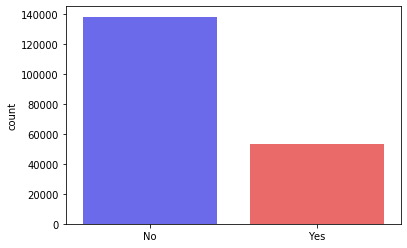

In [16]:
import seaborn as sns
from sklearn.model_selection import train_test_split
y = dataset_Raw['Consumer disputed?'].values
p_ComplaintID = dataset_Raw['Complaint ID'].values
# Split the dataframe 80:20 preserve the distribution of class - use stratify

X_train, X_test, y_train, y_test , trainComplaintID , valComplaintID = train_test_split(dataset_Raw, y, p_ComplaintID , test_size = 0.3,random_state = 17 , stratify = dataset_Raw['Consumer disputed?'])
ColsDrop = ['Consumer disputed?' , 'Complaint ID']
x_train = dataset_Raw.drop(ColsDrop, axis = 1)
sns.countplot(x=y_train, palette='seismic');

# Type of Issues where maximum Sub-Issues & Sub-product fields are missing

In [17]:
#no.of issues count by product and company
temp = dataset_Raw[['Product','Company']].groupby(['Product']).count()
temp = temp.sort_values(by='Company',ascending=False)
temp = temp.reset_index(drop = False)
companies = temp['Company'].value_counts()
print('Numbers of Products : {}'.format(len(companies)))
print (temp)

Numbers of Products : 12
                    Product  Company
0                  Mortgage    90450
1           Debt collection    49350
2          Credit reporting    45714
3               Credit card    32955
4   Bank account or service    30933
5             Consumer Loan    10718
6              Student loan     8630
7           Money transfers     1866
8               Payday loan     1843
9              Prepaid card     1253
10  Other financial service      302
11         Virtual currency        5


Lets consider Top 7 Product for further data analysis

In [18]:
#List of product values to drop
drop_val = ['Money transfers','Payday loan','Prepaid card','Other financial service','Virtual currency']
dataset_Raw = dataset_Raw[~dataset_Raw['Product'].isin(drop_val)]


In [19]:
dataset_Raw.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [20]:
#no.of issues count by product and company
temp = dataset_Raw[['Product','Company']].groupby(['Product']).count()
temp = temp.sort_values(by='Company',ascending=False)
temp = temp.reset_index(drop = False)
companies = temp['Company'].value_counts()
print('Numbers of Products : {}'.format(len(companies)))
print (temp)

Numbers of Products : 7
                   Product  Company
0                 Mortgage    90450
1          Debt collection    49350
2         Credit reporting    45714
3              Credit card    32955
4  Bank account or service    30933
5            Consumer Loan    10718
6             Student loan     8630


In [21]:
dataset_Raw.shape

(268750, 18)

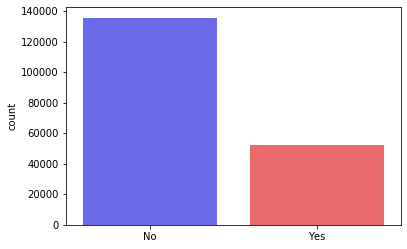

In [22]:
import seaborn as sns
from sklearn.model_selection import train_test_split
y = dataset_Raw['Consumer disputed?'].values
p_ComplaintID = dataset_Raw['Complaint ID'].values
# Split the dataframe 80:20 preserve the distribution of class - use stratify

X_train, X_test, y_train, y_test , trainComplaintID , valComplaintID = train_test_split(dataset_Raw, y, p_ComplaintID , test_size = 0.3,random_state = 17 , stratify = dataset_Raw['Consumer disputed?'])
ColsDrop = ['Consumer disputed?' , 'Complaint ID']
x_train = dataset_Raw.drop(ColsDrop, axis = 1)
sns.countplot(x=y_train, palette='seismic');

Inference : Class Imbalance Problem, Lets see if we can solve using data cleanup

# Check duplicate rows in case of any
### Check duplicate Complaint ID and delete last and keep first    ( to be checked)

In [23]:
dataset_Raw.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [24]:
selected_columns = dataset_Raw[["Product","Sub-product","Issue","Company","Company response to consumer",
                               "Consumer disputed?","Consumer complaint narrative","Company public response",
                               "Submitted via","Date sent to company"]] 
duplicateRowsDF = selected_columns[selected_columns.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

#duplicateRowsDF = dataset_Raw[dataset_Raw.duplicated('Complaint ID')]
#print("Duplicate Rows except first occurrence based on Complaint ID column are :")
#print(duplicateRowsDF)

Duplicate Rows except first occurrence based on all columns are :
                 Product     Sub-product  \
393             Mortgage  Other mortgage   
815     Credit reporting         Missing   
1690    Credit reporting         Missing   
2060    Credit reporting         Missing   
2661    Credit reporting         Missing   
...                  ...             ...   
273984  Credit reporting         Missing   
273996  Credit reporting         Missing   
274000  Credit reporting         Missing   
274001          Mortgage  Other mortgage   
274012  Credit reporting         Missing   

                                           Issue                Company  \
393     Loan servicing, payments, escrow account  Wells Fargo & Company   
815       Incorrect information on credit report               Experian   
1690      Incorrect information on credit report               Experian   
2060      Incorrect information on credit report                Equifax   
2661      Incorrect informatio

In [25]:
#Dropping duplicates based on below subset of columns
dataset_Raw.drop_duplicates(subset=["Product","Sub-product","Issue","Company","Company response to consumer",
                               "Consumer disputed?","Consumer complaint narrative","Company public response",
                               "Submitted via","Date sent to company"], keep='last',inplace=True)

In [26]:
dataset_Raw.shape

(242113, 18)

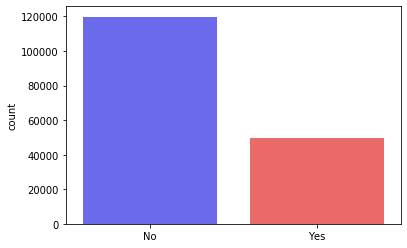

In [27]:
y = dataset_Raw['Consumer disputed?'].values
p_ComplaintID = dataset_Raw['Complaint ID'].values
# Split the dataframe 80:20 preserve the distribution of class - use stratify

X_train, X_test, y_train, y_test , trainComplaintID , valComplaintID = train_test_split(dataset_Raw, y, p_ComplaintID , test_size = 0.3,random_state = 17 , stratify = dataset_Raw['Consumer disputed?'])
ColsDrop = ['Consumer disputed?' , 'Complaint ID']
x_train = dataset_Raw.drop(ColsDrop, axis = 1)
sns.countplot(x=y_train, palette='seismic');

In [28]:
for i in dataset_Raw.select_dtypes(['object']).columns:
    print (i,":",dataset_Raw[i].nunique())

Date received : 1758
Product : 7
Sub-product : 30
Issue : 76
Sub-issue : 61
Consumer complaint narrative : 41955
Company public response : 11
Company : 2792
State : 62
ZIP code : 21759
Tags : 4
Consumer consent provided? : 5
Submitted via : 6
Date sent to company : 1696
Company response to consumer : 6
Timely response? : 2
Consumer disputed? : 2


# Lets see on sub-issues and sub-products for further data inisghts 

In [29]:
dataset_Raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242113 entries, 0 to 274018
Data columns (total 18 columns):
Date received                   242113 non-null object
Product                         242113 non-null object
Sub-product                     242113 non-null object
Issue                           242113 non-null object
Sub-issue                       242113 non-null object
Consumer complaint narrative    242113 non-null object
Company public response         242113 non-null object
Company                         242113 non-null object
State                           242113 non-null object
ZIP code                        242113 non-null object
Tags                            242113 non-null object
Consumer consent provided?      242113 non-null object
Submitted via                   242113 non-null object
Date sent to company            242113 non-null object
Company response to consumer    242113 non-null object
Timely response?                242113 non-null object
Consumer 

Inference : Dates are not in Date Time Format

In [30]:
dataset_Raw['Date received'] = pd.to_datetime(dataset_Raw['Date received'])
dataset_Raw['Date sent to company'] = pd.to_datetime(dataset_Raw['Date sent to company'])

In [31]:
#Check for duplicate exact Consumer complaint narrative
if (dataset_Raw['Consumer complaint narrative'].duplicated().all()):
    print ("Exact Compliant Narrative exists as duplicates, possibly spam ")
else:
    print ("Unique Compliant Narrative exists")

Unique Compliant Narrative exists


In [32]:
dataset_Raw.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2015-04-26,Bank account or service,Other bank product/service,Deposits and withdrawals,Missing,RE : XXXX XXXX XXXX-PRIVILEGED AND CONFIDENTIA...,Missing,Wells Fargo & Company,GA,319XX,Missing,Consent provided,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613
1,2015-01-30,Debt collection,Medical,Disclosure verification of debt,Not given enough info to verify debt,Missing,Missing,"HCFS Health Care Financial Services, Inc.",CA,90036,Missing,Missing,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613
2,2014-01-10,Credit card,Missing,APR or interest rate,Missing,Missing,Missing,TD Bank US Holding Company,FL,33180,Missing,Missing,Web,2014-01-15,Closed with explanation,Yes,Yes,663281
3,2015-12-07,Credit card,Missing,Payoff process,Missing,Missing,Missing,Capital One,IL,60610,Missing,Consent not provided,Web,2015-12-07,Closed with explanation,Yes,Yes,1685130
4,2012-04-05,Bank account or service,Checking account,Deposits and withdrawals,Missing,Missing,Missing,"Citizens Financial Group, Inc.",PA,18337,Missing,Missing,Web,2012-04-05,Closed with relief,Yes,Yes,44225


# Check the Consumerdisputed ratio with missing sub-products and sub-issues

In [33]:
#Groupby sub-Issues
dataset_Raw['COUNTER'] =1     
group_data = dataset_Raw.groupby(['Issue','Sub-issue','Consumer disputed?'])['COUNTER'].sum()
group_data.sort_values(ascending=False,inplace=True)
print (group_data)

Issue                                     Sub-issue         Consumer disputed?
Loan modification,collection,foreclosure  Missing           No                    25824
Loan servicing, payments, escrow account  Missing           No                    18846
Loan modification,collection,foreclosure  Missing           Yes                   12582
Cont'd attempts collect debt not owed     Debt is not mine  No                     9249
Account opening, closing, or management   Missing           No                     9246
                                                                                  ...  
Charged bank acct wrong day or amt        Missing           Yes                       2
Lender sold the property                  Missing           No                        1
Received a loan I didn't apply for        Missing           No                        1
Lender damaged or destroyed property      Missing           Yes                       1
Lender sold the property                 

Inference: If Sub-Issue is missing, there is no correlation if Consumer disputed is Yes or No

In [34]:
#Groupby sub-Issues
dataset_Raw['COUNTER'] =1     
group_data = dataset_Raw.groupby(['Product','Sub-product','Consumer disputed?'])['COUNTER'].sum()
group_data.sort_values(ascending=False,inplace=True)
print (group_data)

Product                  Sub-product                         Consumer disputed?
Credit card              Missing                             No                    23090
Credit reporting         Missing                             No                    22805
Mortgage                 Other mortgage                      No                    20190
                         Conventional fixed mortgage         No                    16761
Bank account or service  Checking account                    No                    15625
                                                                                   ...  
Mortgage                 Second mortgage                     Yes                      90
Bank account or service  Cashing a check without an account  Yes                      65
Consumer Loan            Title loan                          Yes                      49
                         Pawn loan                           No                       15
                              

Inference: There is no Sub-Product for Credit Card & Credit reporting, Need to check, Consumer disputed ration for top 7 selected products. 

In [35]:
df_creditcard = dataset_Raw[['Product','Consumer disputed?']]
df_creditcard['COUNTER'] =1     
group_data = df_creditcard.groupby(['Product','Consumer disputed?'])['COUNTER'].sum()
group_data.sort_values(ascending=False,inplace=True)
print (group_data)

C:\Users\shaaruns.CORPDOM\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Product                  Consumer disputed?
Mortgage                 No                    54088
Debt collection          No                    36133
Mortgage                 Yes                   26300
Credit card              No                    23090
Credit reporting         No                    22805
Bank account or service  No                    22071
Debt collection          Yes                   12686
Credit card              Yes                    9266
Credit reporting         Yes                    8906
Bank account or service  Yes                    8143
Consumer Loan            No                     7330
Student loan             No                     5693
Consumer Loan            Yes                    3298
Student loan             Yes                    2304
Name: COUNTER, dtype: int64


Inference: Mortgage & Debt collection has least number of disputed consumers

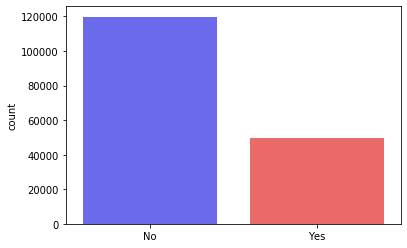

In [36]:
y = dataset_Raw['Consumer disputed?'].values
p_ComplaintID = dataset_Raw['Complaint ID'].values
# Split the dataframe 80:20 preserve the distribution of class - use stratify

X_train, X_test, y_train, y_test , trainComplaintID , valComplaintID = train_test_split(dataset_Raw, y, p_ComplaintID , test_size = 0.3,random_state = 17 , stratify = dataset_Raw['Consumer disputed?'])
ColsDrop = ['Consumer disputed?' , 'Complaint ID']
x_train = dataset_Raw.drop(ColsDrop, axis = 1)
sns.countplot(x=y_train, palette='seismic');

In [37]:
dataset_Raw.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID', 'COUNTER'],
      dtype='object')

In [38]:
#Groupby Tags
dataset_Raw['COUNTER'] =1     
group_data = dataset_Raw.groupby(['Tags','Consumer disputed?'])['COUNTER'].sum()
group_data.sort_values(ascending=False,inplace=True)
print (group_data)

Tags                           Consumer disputed?
Missing                        No                    146607
                               Yes                    60390
Older American                 No                     14167
Servicemember                  No                      8330
Older American                 Yes                     6151
Servicemember                  Yes                     3525
Older American, Servicemember  No                      2106
                               Yes                      837
Name: COUNTER, dtype: int64


Inference : Tags is almost missing in the dataset and no correlation like missed tags are mostly a disputed customer

In [39]:
#Groupby Company 
dataset_Raw['COUNTER'] =1     
group_data = dataset_Raw.groupby(['Company','Timely response?','Consumer disputed?'])['COUNTER'].sum()
group_data.sort_values(ascending=False,inplace=True)
print (group_data)

Company                               Timely response?  Consumer disputed?
Bank of America                       Yes               No                    14992
Wells Fargo & Company                 Yes               No                    12093
JPMorgan Chase & Co.                  Yes               No                    10584
Citibank                              Yes               No                     8608
Experian                              Yes               No                     7778
                                                                              ...  
Gross Polowy LLC                      Yes               No                        1
Grimley Financial Corporation         Yes               No                        1
                                      No                No                        1
Greentree Mortgage Company, LP        Yes               No                        1
1st 2nd Mortgage Company Of NJ, Inc.  Yes               No                        1
N

Inference: Since top companies has more complaints, high number of consumer disputed or not disputed data is expected. 

In [40]:
#Groupby Company
dataset_Raw['COUNTER'] =1     
group_data = dataset_Raw.groupby(['Company'])['COUNTER'].sum()
group_data.sort_values(ascending=False,inplace=True)
#get Top 10 companies only
shortlisted_companies = group_data.head(10) 
print (shortlisted_companies)

Company
Bank of America                           22401
Wells Fargo & Company                     18060
JPMorgan Chase & Co.                      15422
Citibank                                  12151
Equifax                                   11002
Experian                                  10150
TransUnion Intermediate Holdings, Inc.     8833
Ocwen                                      8659
Capital One                                7470
Nationstar Mortgage                        5938
Name: COUNTER, dtype: int64


In [41]:
# selecting rows based on condition 
options = ['Bank of America', 'Wells Fargo & Company','JPMorgan Chase & Co.','Citibank','Equifax',
          'Experian','TransUnion Intermediate Holdings, Inc.','Ocwen','Capital One','Nationstar Mortgage']
df_shortlisted = dataset_Raw[dataset_Raw['Company'].isin(options)] 
df_shortlisted.head() 

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,COUNTER
0,2015-04-26,Bank account or service,Other bank product/service,Deposits and withdrawals,Missing,RE : XXXX XXXX XXXX-PRIVILEGED AND CONFIDENTIA...,Missing,Wells Fargo & Company,GA,319XX,Missing,Consent provided,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613,1
3,2015-12-07,Credit card,Missing,Payoff process,Missing,Missing,Missing,Capital One,IL,60610,Missing,Consent not provided,Web,2015-12-07,Closed with explanation,Yes,Yes,1685130,1
6,2012-01-06,Mortgage,Conventional fixed mortgage,"Application, originator, mortgage broker",Missing,Missing,Missing,Bank of America,CA,90814,Older American,Missing,Web,2012-01-09,Closed without relief,Yes,Yes,10631,1
8,2015-08-04,Debt collection,Credit card,Communication tactics,Frequent or repeated calls,I believe I am late on a payment with Home Dep...,Company chooses not to provide a public response,Citibank,UT,840XX,Missing,Consent provided,Web,2015-08-04,Closed with non-monetary relief,Yes,Yes,1502087,1
13,2015-07-27,Mortgage,VA mortgage,Settlement process and costs,Missing,This is a new complaint. In the after math of ...,Company chooses not to provide a public response,Bank of America,FL,325XX,Missing,Consent provided,Web,2015-07-27,Closed with monetary relief,Yes,Yes,1489180,1


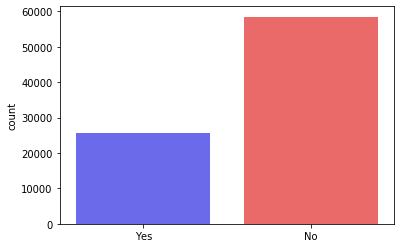

In [42]:
y = df_shortlisted['Consumer disputed?'].values
p_ComplaintID = df_shortlisted['Complaint ID'].values
# Split the dataframe 80:20 preserve the distribution of class - use stratify

X_train, X_test, y_train, y_test , trainComplaintID , valComplaintID = train_test_split(df_shortlisted, y, p_ComplaintID , test_size = 0.3,random_state = 17 , stratify = df_shortlisted['Consumer disputed?'])
ColsDrop = ['Consumer disputed?' , 'Complaint ID']
x_train = df_shortlisted.drop(ColsDrop, axis = 1)
sns.countplot(x=y_train, palette='seismic');

In [43]:
df_shortlisted.shape

(120086, 19)

In [44]:
#Groupby State
df_shortlisted['COUNTER'] =1     
group_data = df_shortlisted.groupby(['State'])['COUNTER'].sum()
group_data.sort_values(ascending=False,inplace=True)
#get Top 20 States only
shortlisted_states = group_data.head(20) 
print (shortlisted_states)


State
CA    20675
FL    11771
NY     8898
TX     8678
GA     5432
NJ     5101
IL     4197
MD     4042
VA     3958
PA     3808
NC     3429
OH     3069
MI     2975
AZ     2779
WA     2561
MA     2316
CO     2105
NV     1546
TN     1492
OR     1479
Name: COUNTER, dtype: int64


C:\Users\shaaruns.CORPDOM\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [45]:
# selecting rows based on condition 
options = ['CA','FL','NY','TX','GA',
           'NJ','IL','MD','VA','PA',
           'NC','OH','MI','AZ','WA',
           'MA','CO','NV','TN','OR']
df_shortlisted = df_shortlisted[df_shortlisted['State'].isin(options)] 
df_shortlisted.head() 

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,COUNTER
0,2015-04-26,Bank account or service,Other bank product/service,Deposits and withdrawals,Missing,RE : XXXX XXXX XXXX-PRIVILEGED AND CONFIDENTIA...,Missing,Wells Fargo & Company,GA,319XX,Missing,Consent provided,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613,1
3,2015-12-07,Credit card,Missing,Payoff process,Missing,Missing,Missing,Capital One,IL,60610,Missing,Consent not provided,Web,2015-12-07,Closed with explanation,Yes,Yes,1685130,1
6,2012-01-06,Mortgage,Conventional fixed mortgage,"Application, originator, mortgage broker",Missing,Missing,Missing,Bank of America,CA,90814,Older American,Missing,Web,2012-01-09,Closed without relief,Yes,Yes,10631,1
13,2015-07-27,Mortgage,VA mortgage,Settlement process and costs,Missing,This is a new complaint. In the after math of ...,Company chooses not to provide a public response,Bank of America,FL,325XX,Missing,Consent provided,Web,2015-07-27,Closed with monetary relief,Yes,Yes,1489180,1
15,2014-04-06,Mortgage,Conventional adjustable mortgage (ARM),"Loan modification,collection,foreclosure",Missing,Missing,Missing,Nationstar Mortgage,CO,80226,Missing,Missing,Web,2014-04-06,Closed with explanation,Yes,Yes,795636,1


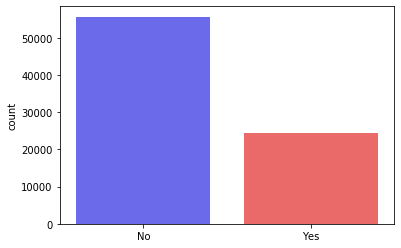

In [46]:
y = df_shortlisted['Consumer disputed?'].values
p_ComplaintID = df_shortlisted['Complaint ID'].values
# Split the dataframe 80:20 preserve the distribution of class - use stratify

X_train, X_test, y_train, y_test , trainComplaintID , valComplaintID = train_test_split(df_shortlisted, y, p_ComplaintID , test_size = 0.2,random_state = 17 , stratify = df_shortlisted['Consumer disputed?'])
ColsDrop = ['Consumer disputed?' , 'Complaint ID']
x_train = df_shortlisted.drop(ColsDrop, axis = 1)
sns.countplot(x=y_train, palette='seismic');

In [47]:
df_shortlisted.shape

(100311, 19)

In [48]:
dataset_Raw.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID', 'COUNTER'],
      dtype='object')

Inference: Timely response & Number of days held is not the only criteria for a disputed customer.

# Compute some derived columns from data files to get some numeric data

### Extracting Date, Month and Year from Date Column¶

# Find time in days to response by the company¶

In [49]:
import datetime as dt
df_shortlisted['Days held'] = df_shortlisted['Date sent to company'] - df_shortlisted['Date received']
#### Using Date received 
df_shortlisted['Year_Received']  = pd.DatetimeIndex(df_shortlisted['Date received']).year
df_shortlisted['Month_Received'] = pd.DatetimeIndex(df_shortlisted['Date received']).month
df_shortlisted['Day_Received']   = pd.DatetimeIndex(df_shortlisted['Date received']).day

#### Date sent to company 
df_shortlisted['Year_Sent']  = pd.DatetimeIndex(df_shortlisted['Date sent to company']).year
df_shortlisted['Month_Sent'] = pd.DatetimeIndex(df_shortlisted['Date sent to company']).month
df_shortlisted['Day_Sent']   = pd.DatetimeIndex(df_shortlisted['Date sent to company']).day

#Fidn the weekday respective date/day
df_shortlisted['weekday'] = df_shortlisted[['Date received']].apply(lambda x: dt.datetime.strftime(x['Date received'], '%A'), axis=1)


In [50]:
#Object type of Days held is timedelta64[ns]. So convert it to integer
df_shortlisted['Days held'] = df_shortlisted['Days held'].astype('timedelta64[D]').astype(int)

In [51]:
week_train = []  # Define a null list 
for i in df_shortlisted['Day_Received']:
    if i < 8:
        week_train.append(1)
    elif i >= 8 and i < 16:
        week_train.append(2)
    elif i >=16 and i < 22:
        week_train.append(3)
    else:
        week_train.append(4)
df_shortlisted['Week_Received'] = week_train

In [52]:
#print  days held datatype
print(df_shortlisted['Days held'].dtypes)

int32


In [53]:
df_shortlisted.dtypes

Date received                   datetime64[ns]
Product                                 object
Sub-product                             object
Issue                                   object
Sub-issue                               object
Consumer complaint narrative            object
Company public response                 object
Company                                 object
State                                   object
ZIP code                                object
Tags                                    object
Consumer consent provided?              object
Submitted via                           object
Date sent to company            datetime64[ns]
Company response to consumer            object
Timely response?                        object
Consumer disputed?                      object
Complaint ID                             int64
COUNTER                                  int64
Days held                                int32
Year_Received                            int64
Month_Receive

In [54]:
#List of columns after data/column transformation
df_shortlisted.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID', 'COUNTER',
       'Days held', 'Year_Received', 'Month_Received', 'Day_Received',
       'Year_Sent', 'Month_Sent', 'Day_Sent', 'weekday', 'Week_Received'],
      dtype='object')

In [55]:
#Groupby State
df_shortlisted['COUNTER'] =1     
group_data = df_shortlisted.groupby(['Timely response?','Consumer disputed?'])['COUNTER'].sum()
group_data.sort_values(ascending=False,inplace=True)
#get Top 20 States only
shortlisted_states = group_data.head(20) 
print (shortlisted_states)

Timely response?  Consumer disputed?
Yes               No                    69099
                  Yes                   30423
No                No                      535
                  Yes                     254
Name: COUNTER, dtype: int64


In [56]:
df_shortlisted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100311 entries, 0 to 274018
Data columns (total 28 columns):
Date received                   100311 non-null datetime64[ns]
Product                         100311 non-null object
Sub-product                     100311 non-null object
Issue                           100311 non-null object
Sub-issue                       100311 non-null object
Consumer complaint narrative    100311 non-null object
Company public response         100311 non-null object
Company                         100311 non-null object
State                           100311 non-null object
ZIP code                        100311 non-null object
Tags                            100311 non-null object
Consumer consent provided?      100311 non-null object
Submitted via                   100311 non-null object
Date sent to company            100311 non-null datetime64[ns]
Company response to consumer    100311 non-null object
Timely response?                100311 non-null 

# Save first phase of cleaned up file for future analysis

In [57]:
df_shortlisted.drop('COUNTER',axis=1,inplace=True)

In [58]:
#List of columns after data/column transformation
df_shortlisted.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID', 'Days held',
       'Year_Received', 'Month_Received', 'Day_Received', 'Year_Sent',
       'Month_Sent', 'Day_Sent', 'weekday', 'Week_Received'],
      dtype='object')

In [59]:
df_shortlisted.shape

(100311, 27)

# Chi-Square Test 

The test is applied when you have two categorical variables from a single population. It is used to determine whether there is a significant association between the two variables.

In [60]:
from scipy.stats import chi2
from scipy.stats import chi2_contingency

In [61]:
def find_P_value_func(contigency_table,alpha):
    #Observed Values
    Observed_Values = contigency_table.values
    val=chi2_contingency(contigency_table)
    Expected_Values=val[3]
    no_of_rows=len(contigency_table.iloc[0:2,0])
    no_of_columns=len(contigency_table.iloc[0,0:2])
    ddof=(no_of_rows-1)*(no_of_columns-1)
    #print("Degree of Freedom:-",ddof)
    #alpha = 0.05
    chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
    chi_square_statistic=chi_square[0]+chi_square[1]
    #print("chi-square statistic:-",chi_square_statistic)
    critical_value=chi2.ppf(q=1-alpha,df=ddof)
    #print('critical_value:',critical_value)
    p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
    return p_value,chi_square_statistic,critical_value

In [62]:
alpha = 0.05
for (columnName, columnData) in df_shortlisted.iteritems():
    contigency_tab= pd.crosstab(columnData.values,df_shortlisted['Consumer disputed?'],normalize='index') 
    p_val,chi_stat,crit_val = find_P_value_func(contigency_tab,alpha)
    print ("Chi-Square test for :",columnName)
    print ("P Value for ",columnName,":" , p_val)
    print ("chi_square_statistic Value for ",columnName,":" , chi_stat)
    print ("critical_value for ",columnName,":" , crit_val)
    if ( (chi_stat >= crit_val) and (p_val <= alpha)):
        print("Reject H0,There is a relationship between",columnName,"and Consumer disputed variables")
    else:
        print ("No relationship between",columnName,"and Consumer disputed variables")
    print ("\n")

Chi-Square test for : Date received
P Value for  Date received : 0.0
chi_square_statistic Value for  Date received : 181.68387225064413
critical_value for  Date received : 3.841458820694124
Reject H0,There is a relationship between Date received and Consumer disputed variables


Chi-Square test for : Product
P Value for  Product : 0.9141239796633394
chi_square_statistic Value for  Product : 0.01162909387821581
critical_value for  Product : 3.841458820694124
No relationship between Product and Consumer disputed variables


Chi-Square test for : Sub-product
P Value for  Sub-product : 0.3649513981235546
chi_square_statistic Value for  Sub-product : 0.8207827821405373
critical_value for  Sub-product : 3.841458820694124
No relationship between Sub-product and Consumer disputed variables


Chi-Square test for : Issue
P Value for  Issue : 0.012134078513644564
chi_square_statistic Value for  Issue : 6.291172066378198
critical_value for  Issue : 3.841458820694124
Reject H0,There is a relationsh

In [63]:
#features_to_drop = ['Sub-product', 'Sub-issue',
   #    'Company public response', 'Company',
 #      'State', 'Tags', 'Consumer consent provided?',
  #     'Submitted via', 'Company response to consumer',
 #      'Year_Received', 'Month_Received', 'Day_Received',
 #      'Year_Sent', 'Month_Sent', 'Day_Sent', 'weekday',
 #       'Consumer complaint narrative','Date received',
 #       'ZIP code','Date sent to company'
 #                  ]

#df_train_postclean = df_shortlisted.drop(features_to_drop, axis = 1)

In [64]:
#df_train_postclean.shape


In [65]:
#df_train_postclean.columns

# Note: Droping this feature combination as final results are not good. 

In [66]:
## Save first phase of cleaned up file

#df_train_postclean.to_csv(dataFolder+"/Output_CSV/Dataset_Step3_Pre_Processed.csv",index=False)#File name change

In [67]:
df_shortlisted.to_csv(dataFolder+"/Output_CSV/Dataset_Step3_Processed.csv",index=False)#Final CSV from this step

In [68]:
df_shortlisted.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID', 'Days held',
       'Year_Received', 'Month_Received', 'Day_Received', 'Year_Sent',
       'Month_Sent', 'Day_Sent', 'weekday', 'Week_Received'],
      dtype='object')